In [7]:

import pandas as pd
import numpy as np
import re
import os


import missingno as msno


from fancyimpute import IterativeImputer


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC


from imblearn.over_sampling import SMOTE


from xgboost import XGBClassifier


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [10]:
data = pd.read_csv("C:/Users/Pooja Shrivastava/OneDrive/Desktop/Pooja/telecom-churn-case-study-hackathon-c-69 (1)/train.csv")
unseen = pd.read_csv("C:/Users/Pooja Shrivastava/OneDrive/Desktop/Pooja/telecom-churn-case-study-hackathon-c-69 (1)/test.csv")
sample = pd.read_csv("C:/Users/Pooja Shrivastava/OneDrive/Desktop/Pooja/telecom-churn-case-study-hackathon-c-69 (1)/sample.csv")
data_dict = pd.read_csv("C:/Users/Pooja Shrivastava/OneDrive/Desktop/Pooja/telecom-churn-case-study-hackathon-c-69 (1)/data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [12]:
data.head() 

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [14]:
data = data.set_index('id')
data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69999 entries, 0 to 69998
Columns: 171 entries, circle_id to churn_probability
dtypes: float64(135), int64(27), object(9)
memory usage: 91.9+ MB


In [18]:
data.describe(percentiles=(0.25, 0.50, 0.75, 0.90, 0.95, 0.99))

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,311.896596,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,6.410000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,32.100000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,115.060000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
90%,109.0,0.0,0.0,0.0,619.993800,615.661400,614.994600,345.080000,347.908000,343.695000,...,0.000000,0.000000,1.000000,1.000000,1.000000,2792.000000,160.444000,136.272000,110.32800,1.000000
95%,109.0,0.0,0.0,0.0,832.022700,823.236700,828.464700,617.185000,628.437500,620.240000,...,0.000000,0.000000,1.000000,1.000000,1.000000,3108.000000,464.277000,446.353000,400.13400,1.000000
99%,109.0,0.0,0.0,0.0,1400.276640,1414.891380,1445.054800,1447.098000,1478.540900,1472.480500,...,2.000000,2.000000,1.000000,1.000000,1.000000,3651.000000,1226.659800,1254.279000,1188.26780,1.000000


In [20]:
data['circle_id'].unique()

array([109], dtype=int64)

In [22]:
X = data.drop(['circle_id'], axis=1).iloc[:,:-1]
y = data.iloc[:,-1]

X.shape, y.shape

((69999, 169), (69999,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 169), (14000, 169), (55999,), (14000,))

In [28]:
X_train.head()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
id,,,,,,,,,,,,,,,,,,,,,
16263,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,68.958,110.319,415.824,1.98,...,0,1,0,1.0,1.0,1.0,492,0.0,0.0,0.0
50434,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,218.082,171.282,137.422,76.38,...,0,0,0,NaN,NaN,NaN,2378,0.0,0.0,0.0
25239,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.420,224.458,392.972,0.00,...,0,0,0,NaN,NaN,NaN,376,0.0,0.0,0.0
30935,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,100.484,118.290,83.866,7.01,...,0,0,0,NaN,NaN,NaN,2621,0.0,0.0,0.0
60152,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.030,26.553,124.545,0.00,...,0,0,0,NaN,NaN,NaN,439,0.0,0.0,0.0


<Axes: >

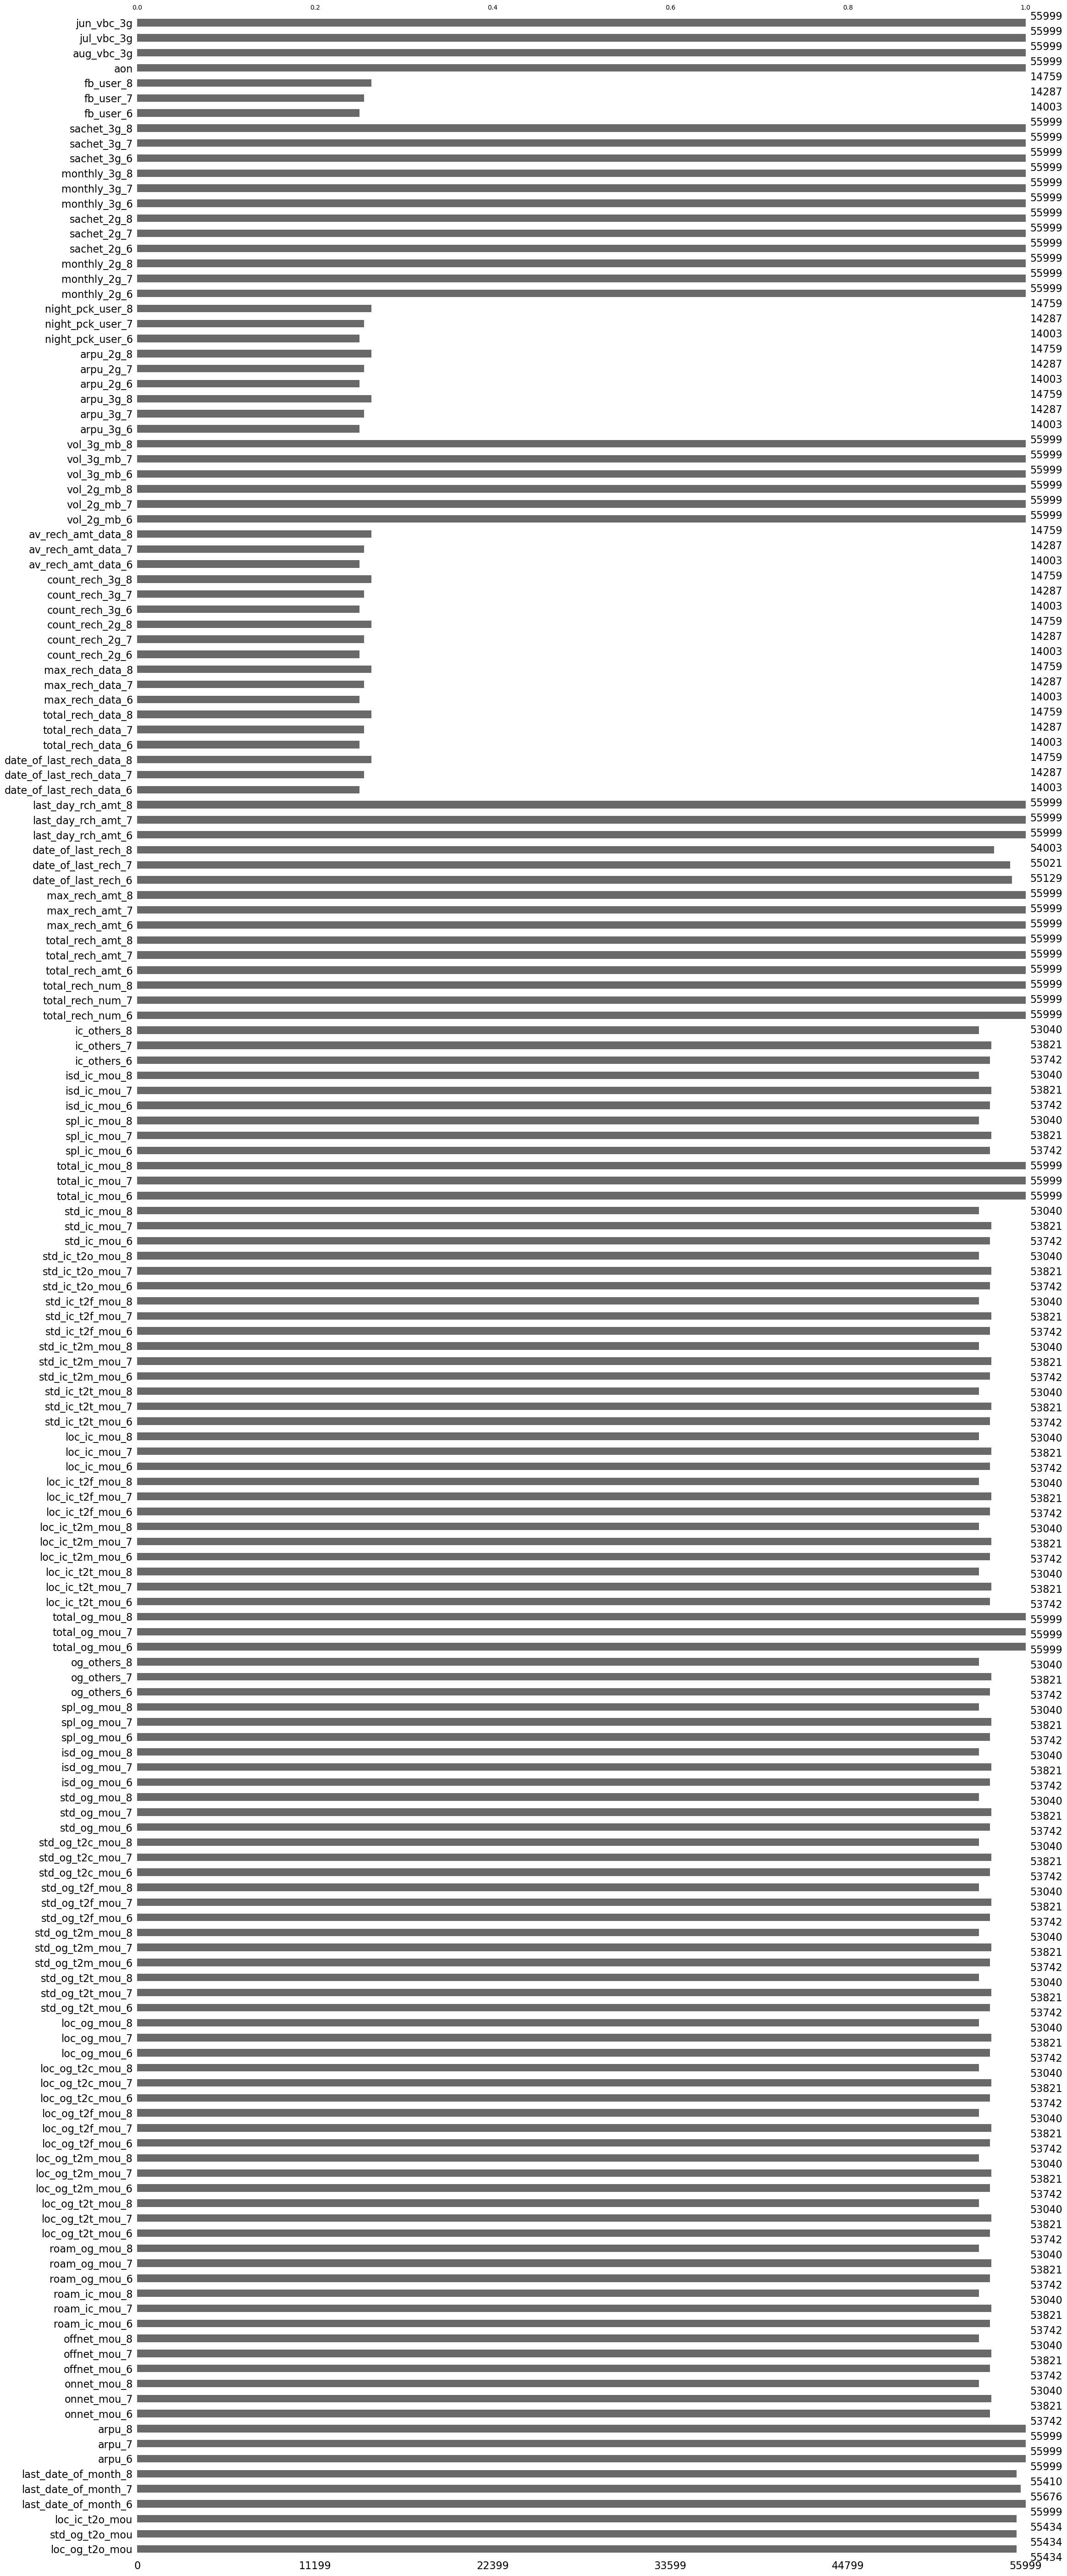

In [32]:
msno.bar(X_train)

<Axes: >

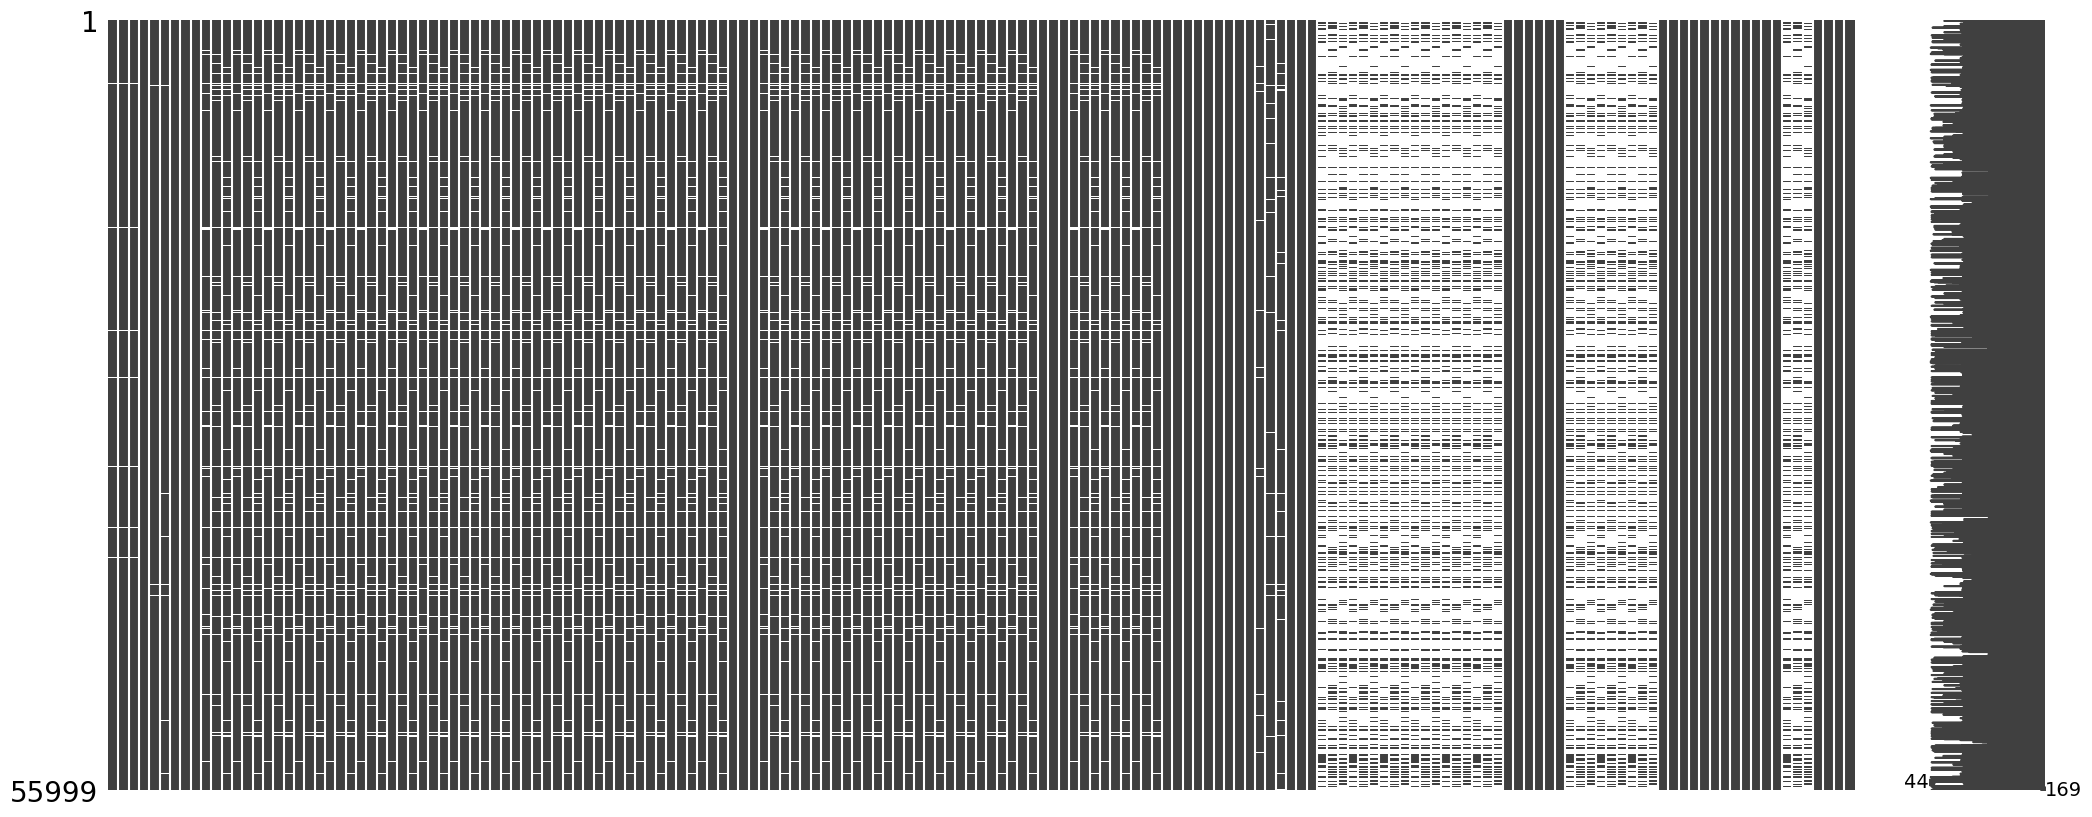

In [40]:
msno.matrix(X_train)

In [42]:
missing_data_percent = 100*X_train.isnull().sum()/len(y_train)
missing_data_percent.sort_values(ascending=False)

total_rech_data_6     74.994196
night_pck_user_6      74.994196
arpu_2g_6             74.994196
arpu_3g_6             74.994196
av_rech_amt_data_6    74.994196
                        ...    
vol_3g_mb_7            0.000000
vol_3g_mb_8            0.000000
total_ic_mou_7         0.000000
total_ic_mou_6         0.000000
jun_vbc_3g             0.000000
Length: 169, dtype: float64

In [44]:
new_vars = missing_data_percent[missing_data_percent.le(30)].index
new_vars

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       ...
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=139)

In [46]:
X_train_filtered = X_train[new_vars]
X_train_filtered.shape

(55999, 139)

In [48]:
missing_data_percent = 100*X_train_filtered.isnull().sum()/len(y_train)
missing_data_percent.sort_values(ascending=False)

loc_og_t2c_mou_8        5.284023
og_others_8             5.284023
isd_ic_mou_8            5.284023
loc_og_mou_8            5.284023
loc_og_t2m_mou_8        5.284023
                          ...   
max_rech_amt_7          0.000000
max_rech_amt_8          0.000000
last_date_of_month_6    0.000000
last_day_rch_amt_6      0.000000
jun_vbc_3g              0.000000
Length: 139, dtype: float64

In [50]:
nonunique_features = [feature for feature in X_train_filtered.columns if X_train_filtered[feature].nunique() == 1]
len(nonunique_features)

12

In [52]:
X_train_filtered[nonunique_features].head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
id,,,,,,,,,,,,
16263,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
50434,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
25239,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
30935,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
60152,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
X_train_filtered.drop(nonunique_features, axis=1, inplace=True)

In [56]:
rech_cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']
X_train_filtered[rech_cols] = X_train_filtered[rech_cols].apply(lambda x: x.fillna(0))

In [58]:
date_cols = X_train_filtered.select_dtypes(include="object").columns
date_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

In [60]:
date_of_last_rech = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [62]:
from datetime import date
date_beyond_dataset = date(2014, 12, 30)

In [64]:
def day_counts(df, date_cols, today, new_col_name):   
    df[new_col_name] = (pd.Timestamp(date_beyond_dataset) - df[date_cols].apply(pd.to_datetime).max(axis=1)).dt.days 
    df.drop(date_cols, axis=1, inplace=True)

In [66]:
day_counts(X_train_filtered, date_of_last_rech, date_beyond_dataset, 'days_from_last_recharge')

In [68]:
X_train_filtered[['days_from_last_recharge']].isnull().mean()

days_from_last_recharge    0.000964
dtype: float64

In [70]:
X_train_filtered[['days_from_last_recharge']] = X_train_filtered[['days_from_last_recharge']].fillna(-1)

In [72]:
missing_data_percent = X_train_filtered.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

In [74]:
imp = SimpleImputer(strategy='constant', fill_value=0)
X_train_filtered[impute_cols] = imp.fit_transform(X_train_filtered[impute_cols])

<Axes: >

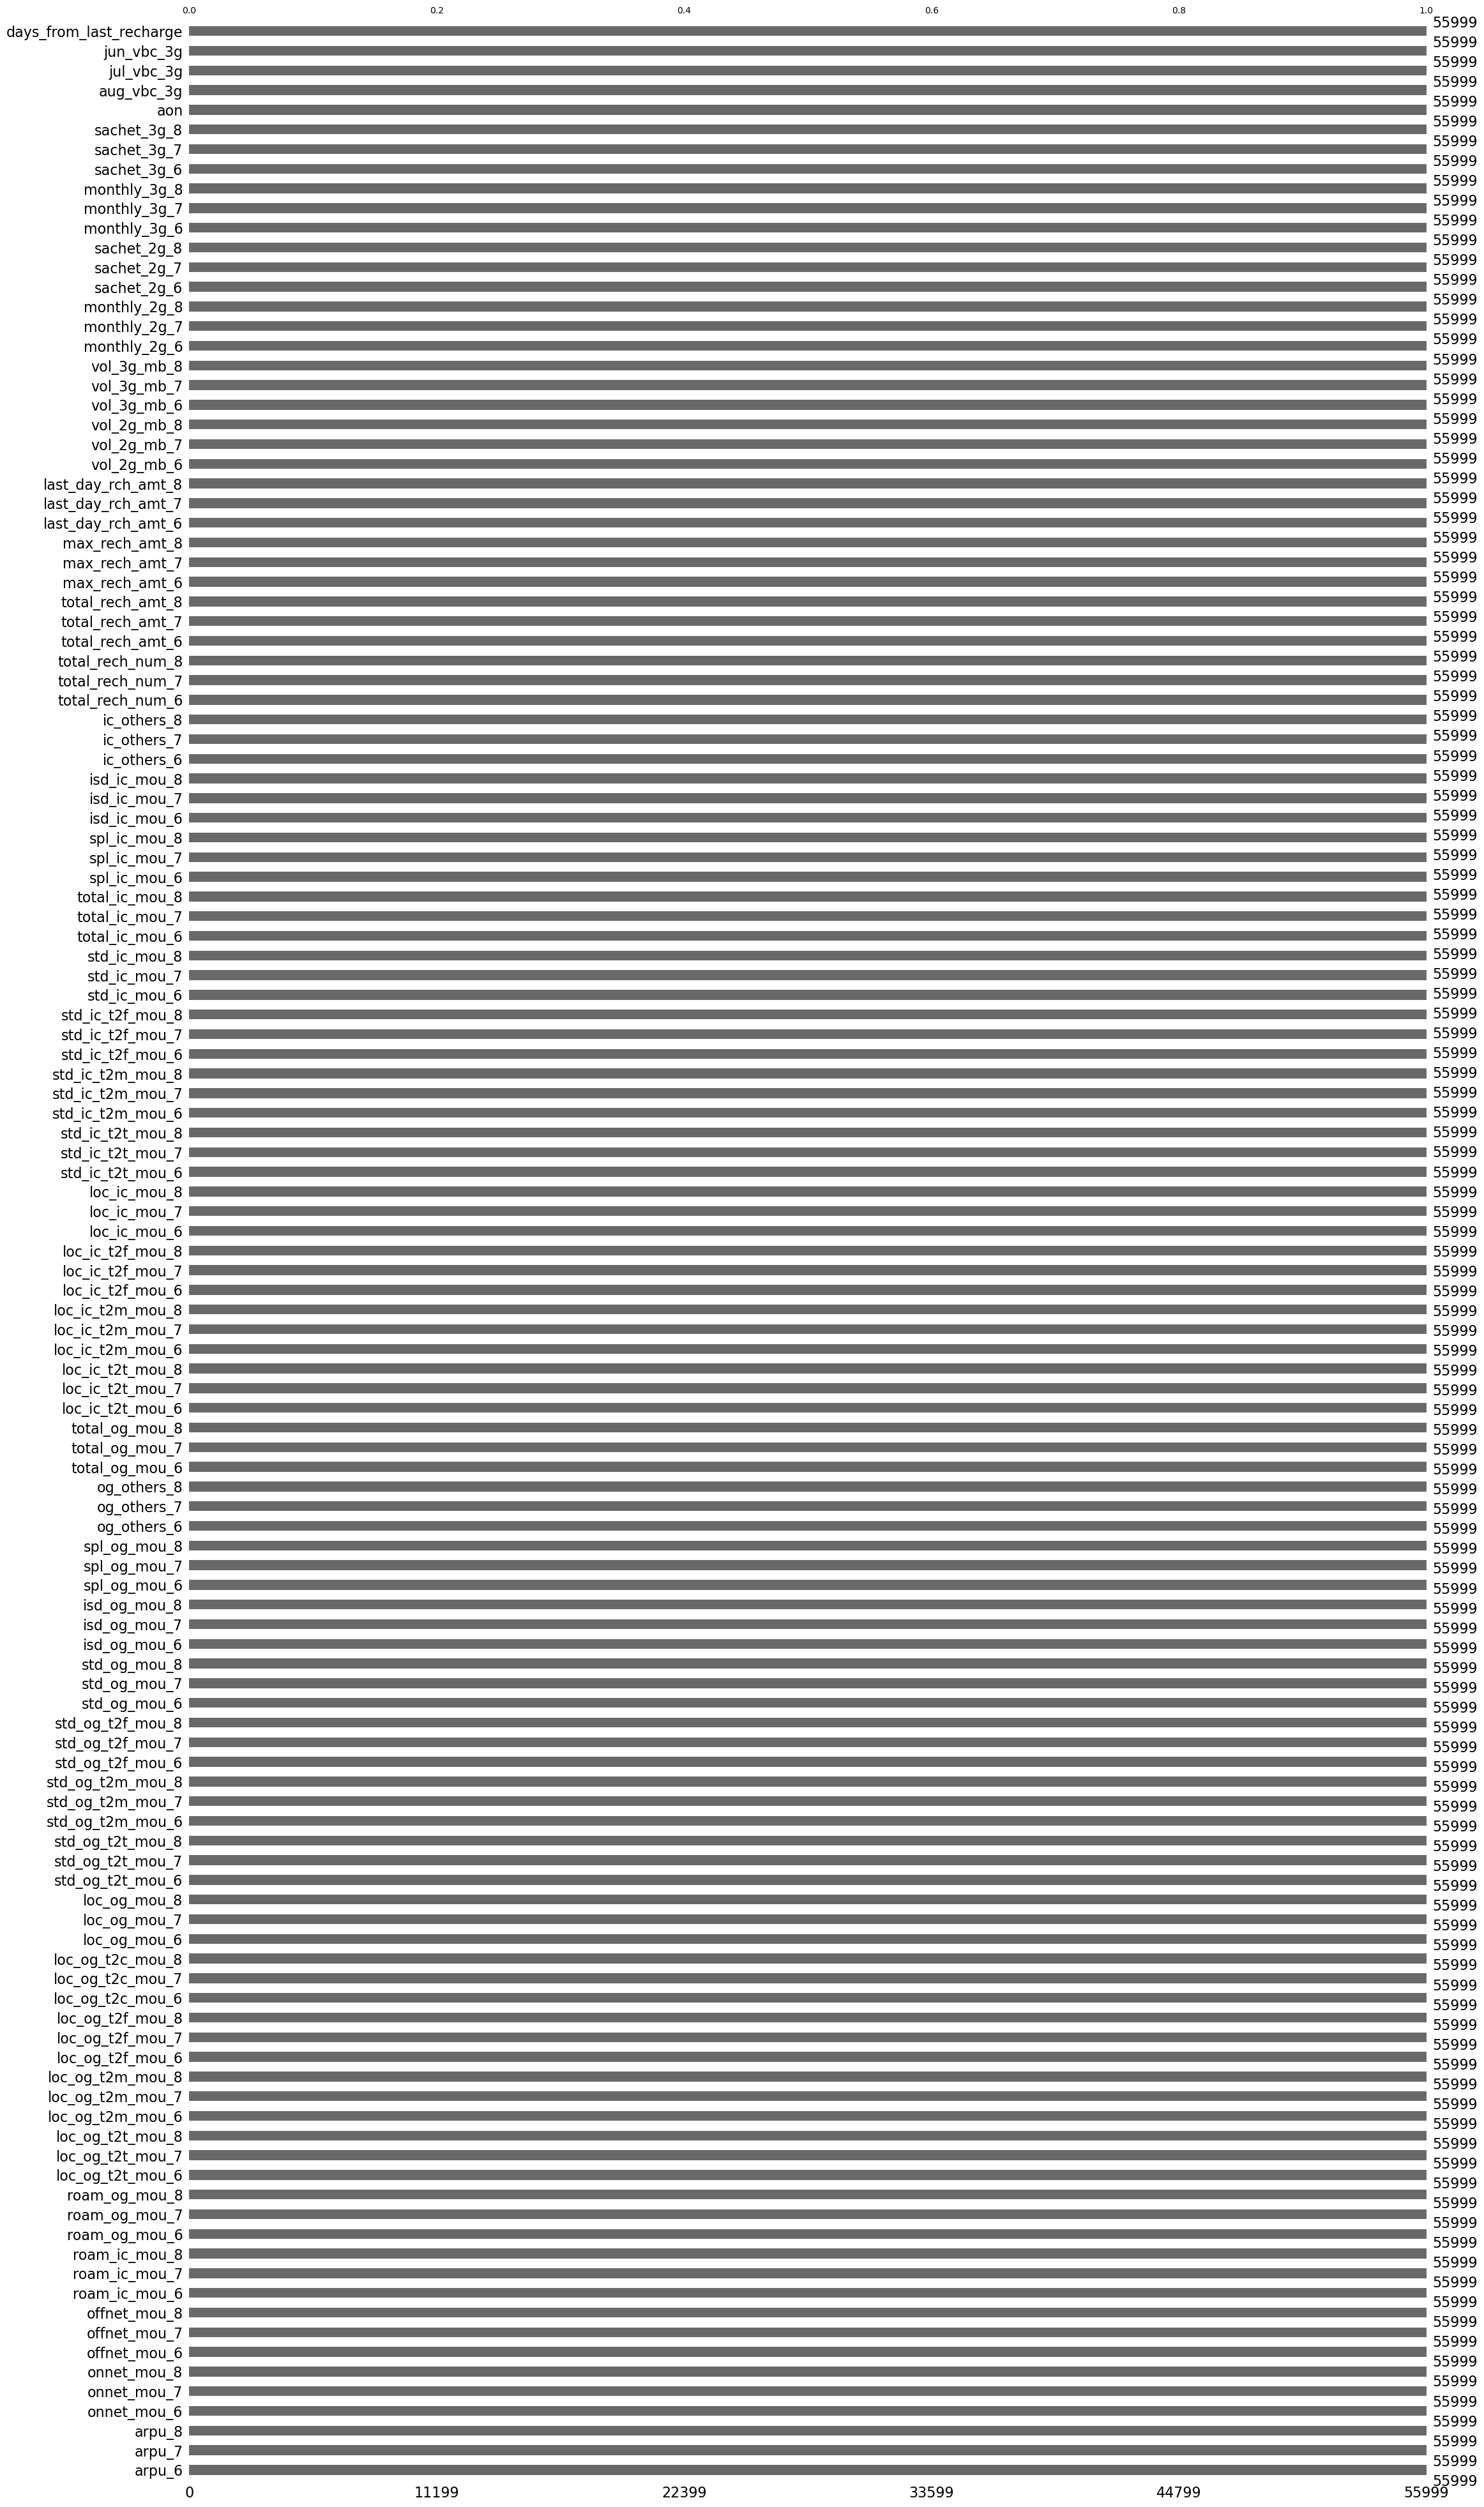

In [76]:
msno.bar(X_train_filtered)

In [78]:
X_train_filtered.isna().mean()

arpu_6                     0.0
arpu_7                     0.0
arpu_8                     0.0
onnet_mou_6                0.0
onnet_mou_7                0.0
                          ... 
aon                        0.0
aug_vbc_3g                 0.0
jul_vbc_3g                 0.0
jun_vbc_3g                 0.0
days_from_last_recharge    0.0
Length: 125, dtype: float64

In [80]:
X_train_filtered.duplicated().sum()

0

In [82]:
X_train_filtered.describe(percentiles=(0.25, 0.50, 0.75, 0.90, 0.95, 0.99))

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,days_from_last_recharge
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,...,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,282.124234,278.453461,279.713345,127.246085,128.379047,126.094698,189.697947,188.950343,185.787862,9.446565,...,0.077555,0.082341,0.076448,0.082805,0.087484,1219.403346,68.384459,65.714932,60.018179,127.899123
std,339.125285,355.075827,363.406147,293.838525,305.266262,305.889904,311.870137,316.448045,318.462232,56.410240,...,0.385831,0.382184,0.563224,0.644175,0.705532,951.660770,272.296128,267.490919,254.981965,11.027712
min,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,-1.000000
25%,92.697500,86.420500,84.379500,5.410000,4.930000,4.160000,28.680000,26.840000,23.840000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.000000,122.000000
50%,196.782000,191.473000,191.792000,30.740000,29.210000,27.930000,89.540000,85.630000,82.980000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,867.000000,0.000000,0.000000,0.000000,125.000000
75%,369.127000,364.384500,370.450000,113.035000,109.485000,106.810000,222.080000,218.070000,216.190000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1809.000000,0.000000,0.000000,0.000000,128.000000
90%,617.551200,615.518400,615.155200,330.254000,334.070000,326.216000,464.824000,469.306000,466.656000,10.890000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2791.000000,161.930000,137.318000,111.568000,139.000000
95%,825.147300,823.903400,829.575200,593.995000,606.181000,594.307000,715.100000,727.872000,710.612000,39.183000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3108.000000,466.087000,449.600000,400.410000,147.000000
99%,1410.792540,1423.853160,1452.517760,1417.989000,1456.702000,1453.890400,1507.884000,1505.963600,1484.010200,216.290800,...,2.000000,2.000000,2.000000,2.000000,2.000000,3651.000000,1223.727200,1244.281400,1173.239400,174.000000


In [86]:
def outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [88]:
X_train_filtered = X_train_filtered.apply(outliers, axis=0)

In [90]:
X_train_filtered.describe(percentiles=(0.25, 0.50, 0.75, 0.90, 0.95, 0.99))

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,days_from_last_recharge
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,...,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,274.391967,270.794050,271.732190,114.184799,114.828434,112.561628,177.389485,176.551056,173.772867,6.863876,...,0.059161,0.063752,0.051570,0.055718,0.057968,1219.325190,55.884436,52.801766,47.614874,127.633993
std,263.009644,266.807196,271.291708,207.118752,213.124655,211.067626,236.878847,240.556056,239.115665,26.562585,...,0.244422,0.252790,0.256045,0.283692,0.295159,951.420126,174.705201,169.804654,157.424068,8.512700
min,-735.251623,-786.774020,-810.505096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,94.815987
25%,92.697500,86.420500,84.379500,5.410000,4.930000,4.160000,28.680000,26.840000,23.840000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.000000,122.000000
50%,196.782000,191.473000,191.792000,30.740000,29.210000,27.930000,89.540000,85.630000,82.980000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,867.000000,0.000000,0.000000,0.000000,125.000000
75%,369.127000,364.384500,370.450000,113.035000,109.485000,106.810000,222.080000,218.070000,216.190000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1809.000000,0.000000,0.000000,0.000000,128.000000
90%,617.551200,615.518400,615.155200,330.254000,334.070000,326.216000,464.824000,469.306000,466.656000,10.890000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2791.000000,161.930000,137.318000,111.568000,139.000000
95%,825.147300,823.903400,829.575200,593.995000,606.181000,594.307000,715.100000,727.872000,710.612000,39.183000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3108.000000,466.087000,449.600000,400.410000,147.000000
99%,1299.500090,1343.680942,1369.931787,1008.761659,1044.177834,1043.764409,1125.308357,1138.294480,1141.174557,178.677284,...,1.235048,1.228893,1.766118,2.000000,2.000000,3651.000000,885.272842,868.187689,824.964074,160.982260


In [92]:
data_eda = pd.concat([X_train_filtered, y_train], axis=1)
data_eda.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,days_from_last_recharge,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
16263,68.958,110.319,415.824,1.98,4.64,4.19,19.36,27.54,64.86,0.00,...,0.0,0.0,1.0,0.0,492.0,0.0,0.0,0.0,126.0,0
50434,218.082,171.282,137.422,76.38,89.24,74.63,144.39,100.54,89.59,0.00,...,0.0,0.0,0.0,0.0,2378.0,0.0,0.0,0.0,131.0,0
25239,0.420,224.458,392.972,0.00,41.96,53.46,0.71,287.28,753.76,3.58,...,0.0,0.0,0.0,0.0,376.0,0.0,0.0,0.0,123.0,0
30935,100.484,118.290,83.866,7.01,0.61,0.00,127.26,104.63,87.08,0.00,...,0.0,0.0,0.0,0.0,2621.0,0.0,0.0,0.0,131.0,0
60152,0.030,26.553,124.545,0.00,0.00,20.86,15.71,7.54,64.54,0.00,...,0.0,0.0,0.0,0.0,439.0,0.0,0.0,0.0,128.0,0


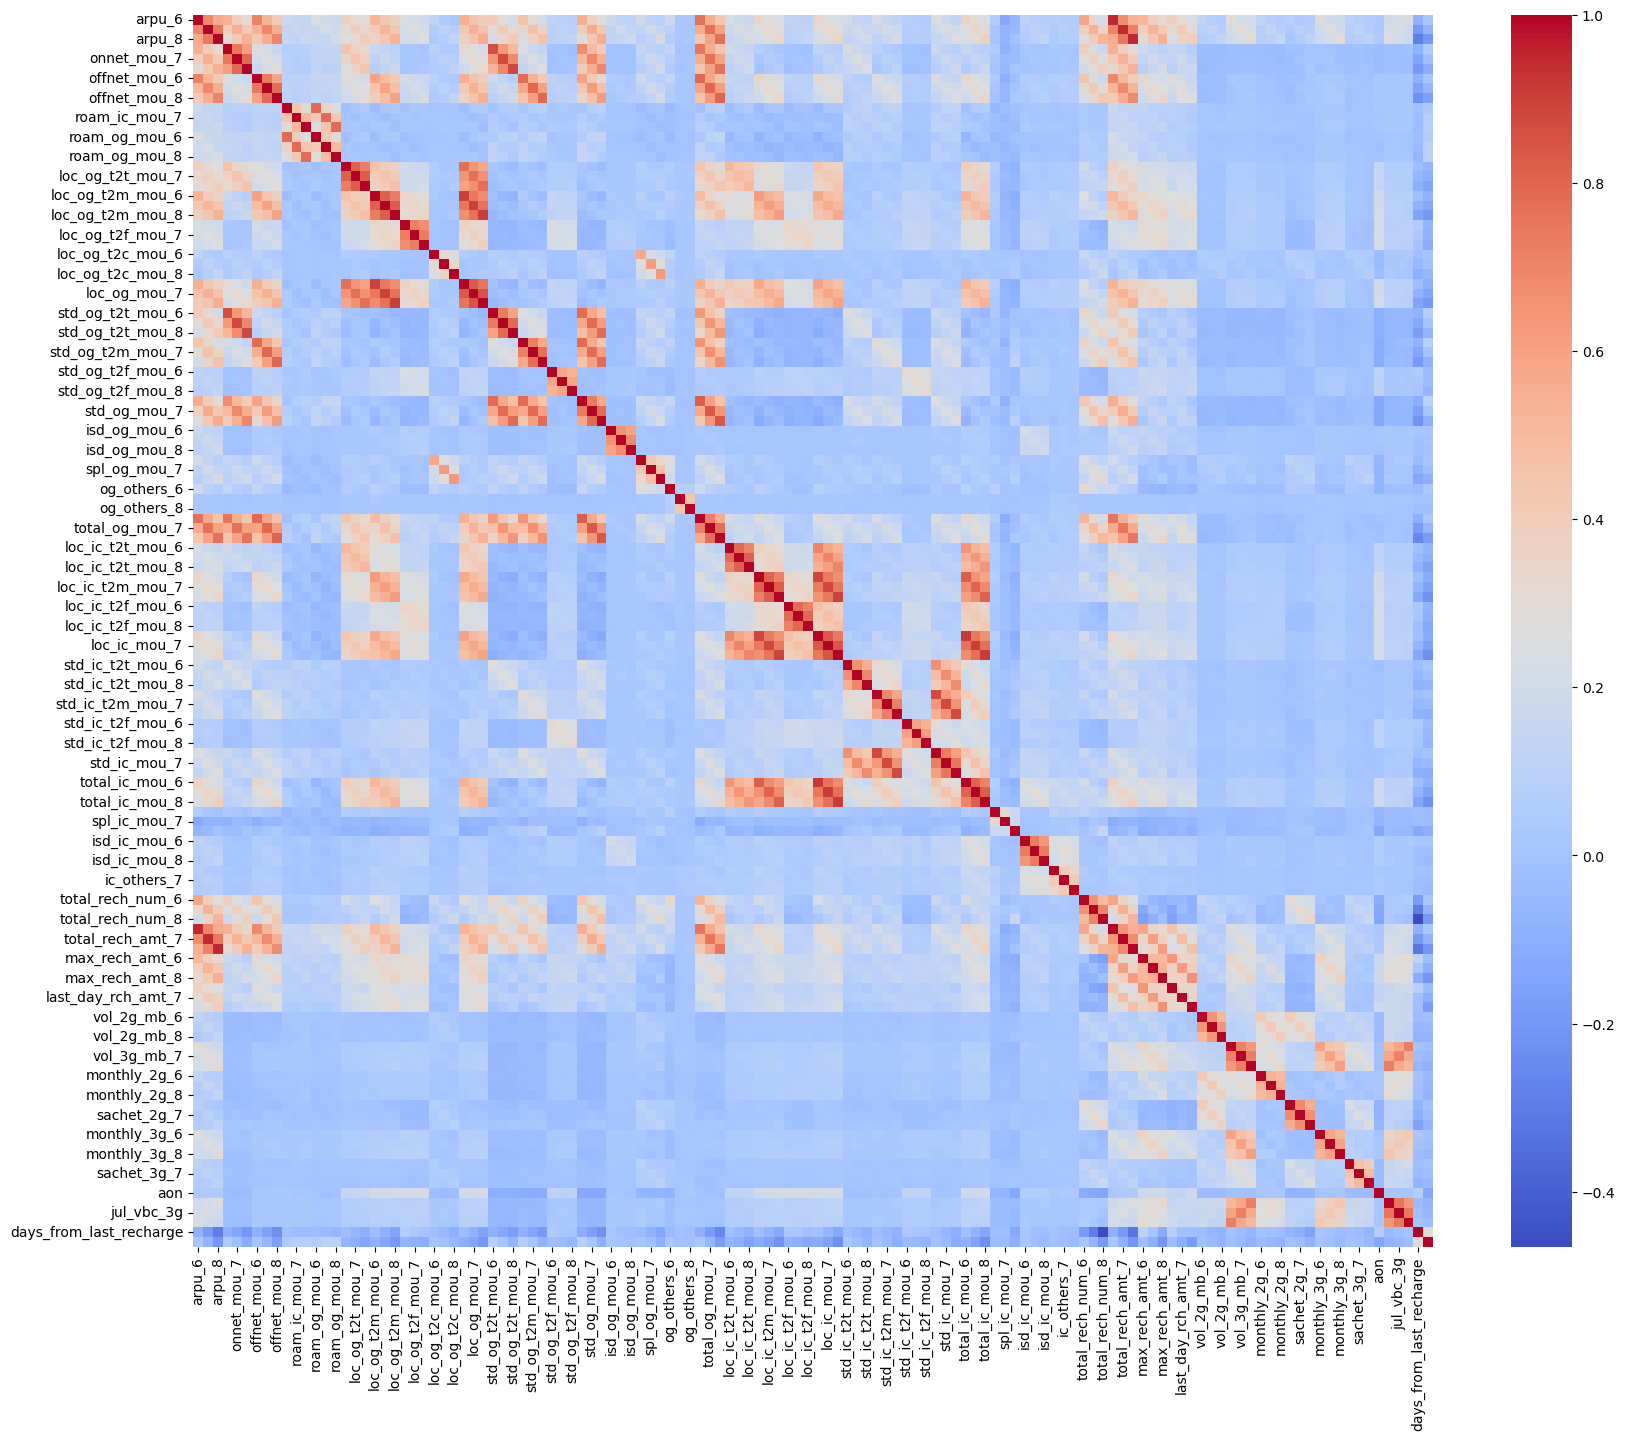

In [94]:
plt.figure(figsize=(20, 16))
sns.heatmap(data_eda.corr(), cmap="coolwarm")
plt.show()

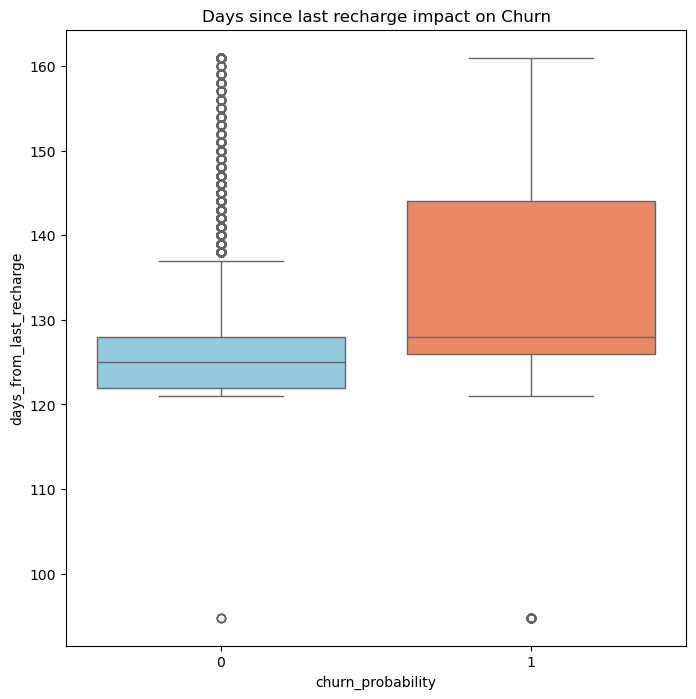

In [98]:
plt.figure(figsize=[8, 8])
sns.boxplot(data=data_eda, x='churn_probability', y='days_from_last_recharge', palette=["skyblue", "coral"])
plt.title("Days since last recharge impact on Churn")
plt.show()

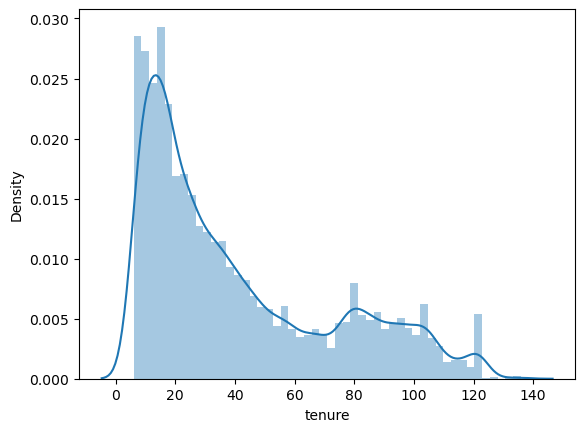

In [100]:
data_eda["tenure"] = data_eda["aon"]/30
sns.distplot(data_eda["tenure"], bins=50)
plt.show()

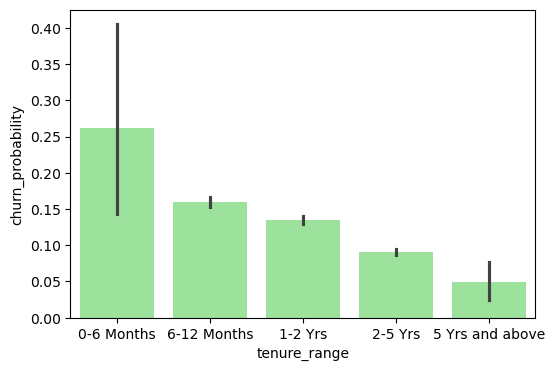

In [102]:
tenure_range = [0, 6, 12, 24, 60, 61]
tenure_label = ['0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
data_eda['tenure_range'] = pd.cut(data_eda['tenure'], tenure_range, labels=tenure_label)
plt.figure(figsize=[6,4])
sns.barplot(x='tenure_range', y='churn_probability', data=data_eda, color='lightgreen')
plt.show()

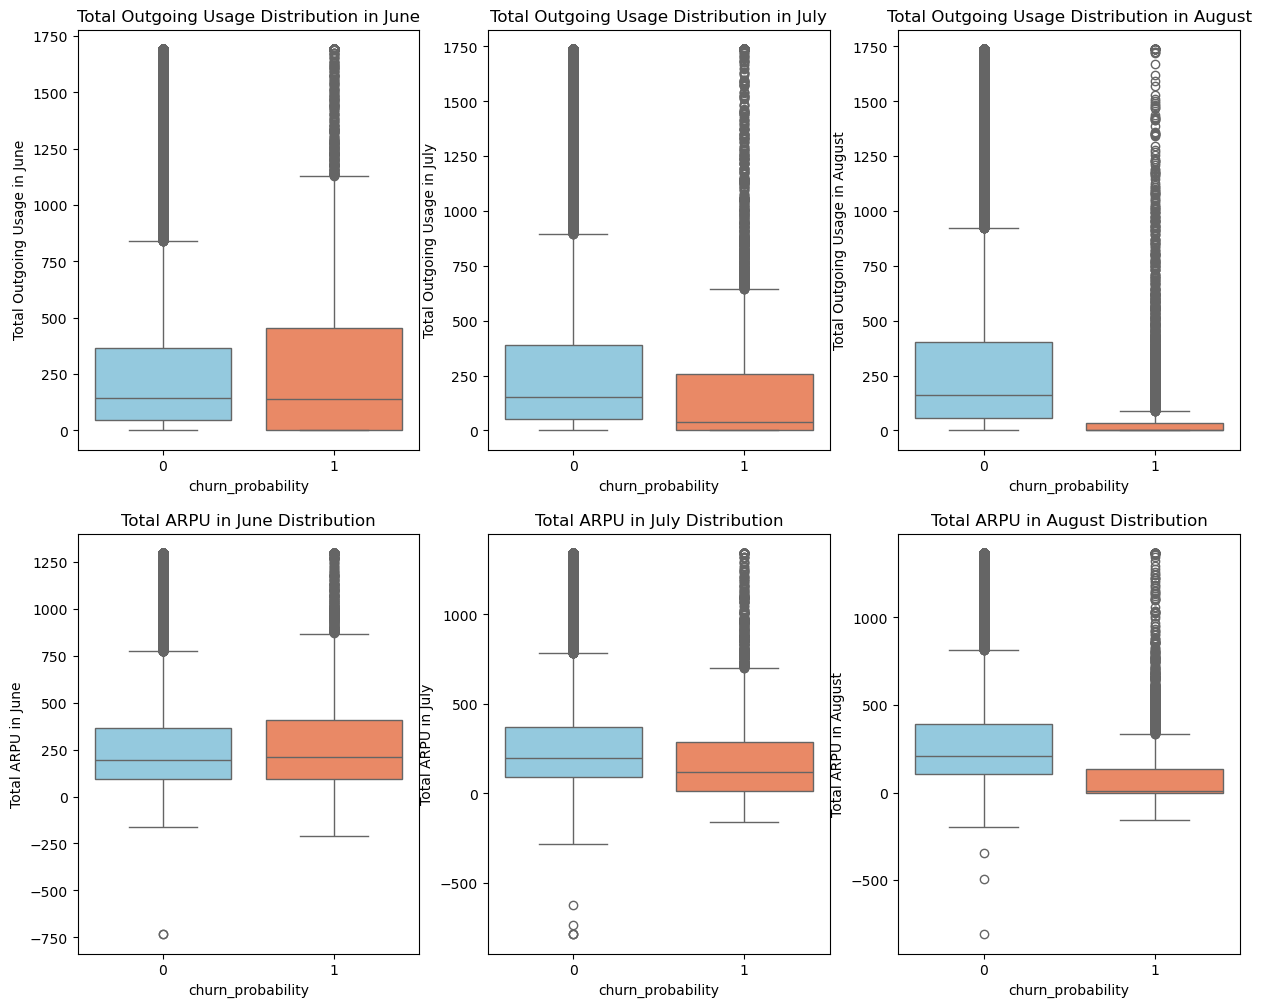

In [104]:
plt.figure(figsize=[15, 12])
plt.subplot(231)
sns.boxplot(x="churn_probability", y='total_og_mou_6', data=data_eda, palette=["skyblue", "coral"])
plt.ylabel('Total Outgoing Usage in June')
plt.title("Total Outgoing Usage Distribution in June")

plt.subplot(232)
sns.boxplot(x="churn_probability", y='total_og_mou_7', data=data_eda, palette=["skyblue", "coral"])
plt.ylabel('Total Outgoing Usage in July')
plt.title("Total Outgoing Usage Distribution in July")

plt.subplot(233)
sns.boxplot(x="churn_probability", y='total_og_mou_8', data=data_eda, palette=["skyblue", "coral"])
plt.ylabel('Total Outgoing Usage in August')
plt.title("Total Outgoing Usage Distribution in August")

plt.subplot(234)
sns.boxplot(x="churn_probability", y='arpu_6', data=data_eda, palette=["skyblue", "coral"])
plt.ylabel('Total ARPU in June')
plt.title("Total ARPU in June Distribution")

plt.subplot(235)
sns.boxplot(x="churn_probability", y='arpu_7', data=data_eda, palette=["skyblue", "coral"])
plt.ylabel('Total ARPU in July')
plt.title("Total ARPU in July Distribution")

plt.subplot(236)
sns.boxplot(x="churn_probability", y='arpu_8', data=data_eda, palette=["skyblue", "coral"])
plt.ylabel('Total ARPU in August')
plt.title("Total ARPU in August Distribution")

plt.show()